In [141]:
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.6/303.6 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.1 MB/s eta 0:00:00


In [142]:
import wandb

In [143]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [144]:
run = wandb.init(
    # Set the project where this run will be logged
    project="urlset",
    # Track hyperparameters and run metadata
    config={
        "learning_rate": 0.01,
        "epochs": 10,
    },
)

wandb: Currently logged in as: marienaitipa (marienaitipa-usiu). Use `wandb login --relogin` to force relogin


In [145]:
# train.py
import wandb
import random  # for demo script

wandb.login()

epochs = 10
lr = 0.01

run = wandb.init(
    # Set the project where this run will be logged
    project="urlset",
    # Track hyperparameters and run metadata
    config={
        "learning_rate": lr,
        "epochs": epochs,
    },
)

offset = random.random() / 5
print(f"lr: {lr}")

# simulating a training run
for epoch in range(2, epochs):
    acc = 1 - 2**-epoch - random.random() / epoch - offset
    loss = 2**-epoch + random.random() / epoch + offset
    print(f"epoch={epoch}, accuracy={acc}, loss={loss}")
    wandb.log({"accuracy": acc, "loss": loss})

# run.log_code()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


lr: 0.01
epoch=2, accuracy=0.2700547175975313, loss=0.5474325260160356
epoch=3, accuracy=0.4780950284123996, loss=0.3883330605766123
epoch=4, accuracy=0.6807716699877506, loss=0.3625406092945529
epoch=5, accuracy=0.8006302690507532, loss=0.21517484637651646
epoch=6, accuracy=0.8112110931426872, loss=0.1848919226661977
epoch=7, accuracy=0.7509823408437545, loss=0.25991213202598284
epoch=8, accuracy=0.8274109654904043, loss=0.21685450841691062
epoch=9, accuracy=0.772836565276929, loss=0.26176327673830935


In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import wandb

In [149]:
# Initialize Weights and Biases
wandb.init(project="url-phishing-detection", name="Decision Tree")

In [150]:
# Initialize Weights & Biases
wandb.init(project="phishing_detection")

Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import pandas as pd

file_path = '/content/urlset.csv'

# Try reading the file while ignoring errors using on_bad_lines='skip'
try:
    data = pd.read_csv(file_path, encoding='latin1', on_bad_lines='skip')
    print('Successfully read the file with latin1 encoding by skipping bad lines.')
except UnicodeDecodeError as e:
    print(f'Failed to read the file with latin1 encoding: {e}')


Successfully read the file with latin1 encoding by skipping bad lines.


<ipython-input-3-e769c0d379d7>:7: DtypeWarning: Columns (1,2,3,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding='latin1', on_bad_lines='skip')


In [4]:
data

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96000,xbox360.ign.com/objects/850/850402.html,339,1.0,1.0,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,0.0
96001,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1.0,0.0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623,0.0
96002,www.gamespot.com/xbox360/action/deadspace/,753,1.0,1.0,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
96003,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1.0,1.0,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0


In [5]:
data['label']=data['label'].replace(['0','1','2'],'non-null')

In [6]:
data

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0,0.748971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96000,xbox360.ign.com/objects/850/850402.html,339,1.0,1.0,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,0.0
96001,games.teamxbox.com/xbox-360/1860/Dead-Space/,63029,1.0,0.0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623,0.0
96002,www.gamespot.com/xbox360/action/deadspace/,753,1.0,1.0,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571,0.0
96003,en.wikipedia.org/wiki/Dead_Space_(video_game),6,1.0,1.0,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323,0.0


In [7]:
## Create a cross-tabulation table to show the frequency distribution of 'label' across combinations of 'domain' and 'ranking'.
pd.crosstab([data['domain'],data['ranking']],data['label'])

,label,0.0,1.0
domain,ranking,,
'0000502.rcomhost.com/secure-listings-redirect/products/ebaymotors/index.php?vhc=1965\%20Ford\%20Mustang&dm',10000000,0,1
'01jt.com/js/?us.battle.net/login/en/?ref=http\%3A\%2F\%2Ftiemoauus.battle.net\%2Fd3\%2Fen\%2Findex&amp;app=com-d3',10000000,0,1
'0576tz.com/js/?us.battle.net/login/en/?ref=http\%3A\%2F\%2Fxxhxsqbus.battle.net\%2Fd3\%2Fen\%2Findex&amp;app=com-d3',10000000,0,1
'100dollardomain.com/?rid=http\%3A\%2F\%2F0x592e288f',10000000,0,1
'118bm.com/images/?app=com-d3&amp;\%A0...',10000000,0,1
...,...,...,...
zzjwhz.com/js/,10000000,0,1
zzjwhz.com/js?us.battle.net/login/en/?ref=us.battle.net/d3/en/index,10000000,0,1
zzz.zggg.com/dice/,10000000,1,0


In [8]:
from sklearn import tree

In [9]:
y=data['label']

In [10]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
96000    0.0
96001    0.0
96002    0.0
96003    0.0
96004    0.0
Name: label, Length: 96005, dtype: float64

In [11]:
# Create a new DataFrame 'X' by dropping the columns 'domain' and 'label' from 'data'
X=data.drop(['domain','label'],axis=1)

In [12]:
X

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
0,10000000,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729
1,10000000,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0,0.768577
2,10000000,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0,0.726582
3,10000000,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0,0.85964
4,10000000,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0,0.748971
...,...,...,...,...,...,...,...,...,...,...,...,...
96000,339,1.0,1.0,2.0,142.500000,141.000000,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906
96001,63029,1.0,0.0,3.0,114.000000,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623
96002,753,1.0,1.0,3.0,91.000000,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571
96003,6,1.0,1.0,4.0,682.000000,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323


In [13]:
# Create a DecisionTreeClassifier instance with specified parameters
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [14]:
clf#initilized the DT

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# Now fit the model
clf = clf.fit(X, y)

In [16]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [83]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [84]:
from IPython.display import Image


In [85]:

# reading created the crosstab
crosstab = pd.crosstab([data['domain'], data['ranking']], data['label'])


In [86]:

# Convert all column names to strings
df.columns = df.columns.astype(str)

In [87]:
# Reset index to convert multi-index to columns
df = crosstab.reset_index()

In [88]:
 #Store column names for later use
feature_columns = df.columns[:-1].tolist()
target_column = df.columns[-1]


In [89]:
# Identify feature columns and target column
feature_columns = df.columns[:-1]  # All columns except the last one
target_column = df.columns[-1]

In [90]:
# Prepare features (X) and target (y)
X = df[feature_columns]
y = df[target_column]

In [91]:
# Convert X to numeric type, replacing non-numeric values with NaN
X = X.apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [92]:
# Replace NaN values with 0 (or another appropriate value)
X = X.fillna(0)

In [93]:
# Convert y to numeric if it's not already
y = pd.to_numeric(y, errors='coerce')


In [94]:
# Convert X and y to numpy arrays WITHOUT column names
X = X.values
y = y.values


In [95]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Create and train the decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [97]:
#making predictions on the test set:
y_pred = dt.predict(X_test)

In [98]:
# To visualize the tree (optional):
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

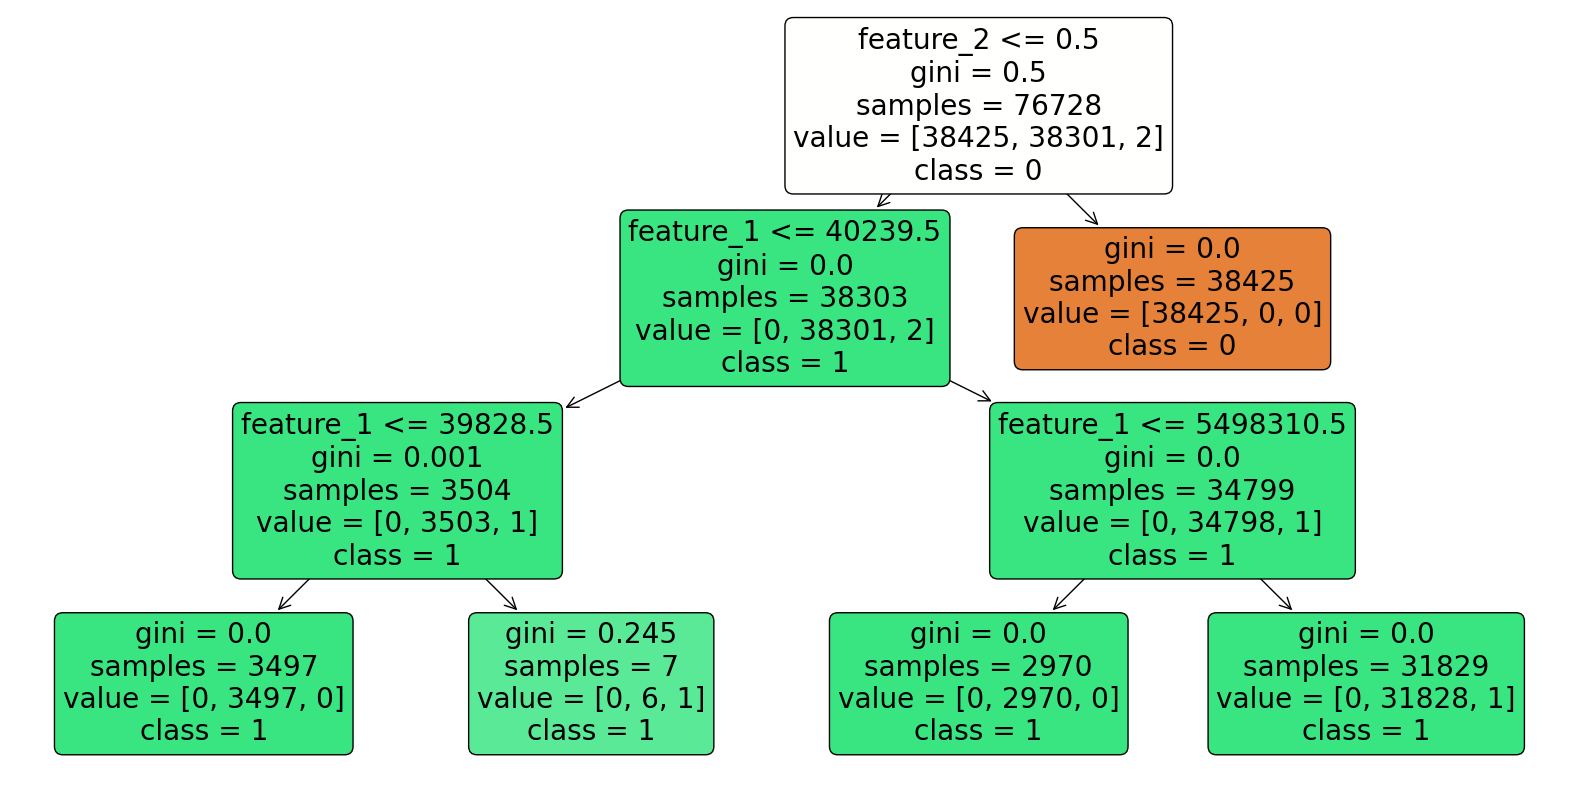

In [99]:
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=[f"feature_{i}" for i in range(X.shape[1])],
          class_names=np.unique(y).astype(str).tolist(), filled=True, rounded=True)
plt.show()

In [102]:
# Generate test data
X_test = X_test  # We already have this from the train_test_split
y_test = y_test  # We already have this from the train_test_split

In [103]:
# Make predictions on the test data
y_pred = dt.predict(X_test)

In [104]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [105]:
# Generate a classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9584
           1       1.00      1.00      1.00      9599

    accuracy                           1.00     19183
   macro avg       1.00      1.00      1.00     19183
weighted avg       1.00      1.00      1.00     19183



In [106]:
# Generate a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

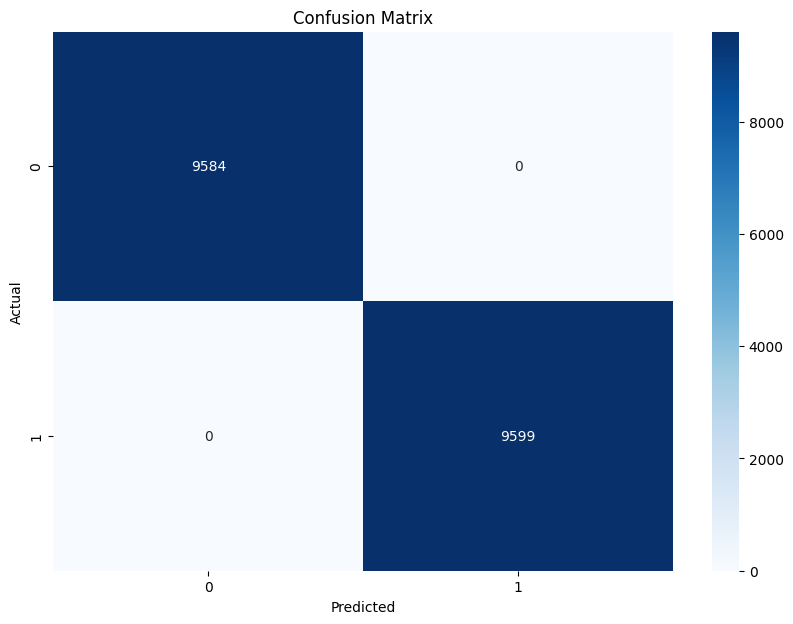

In [107]:
#making predictions
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [108]:
# Feature importance
feature_importance = dt.feature_importances_
feature_names = [f"feature_{i}" for i in range(X.shape[1])]

In [109]:
# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]


In [110]:
# Print the feature ranking
print("\nFeature importance ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], feature_importance[indices[f]]))


Feature importance ranking:
1. feature_2 (0.999993)
2. feature_1 (0.000007)
3. feature_0 (0.000000)


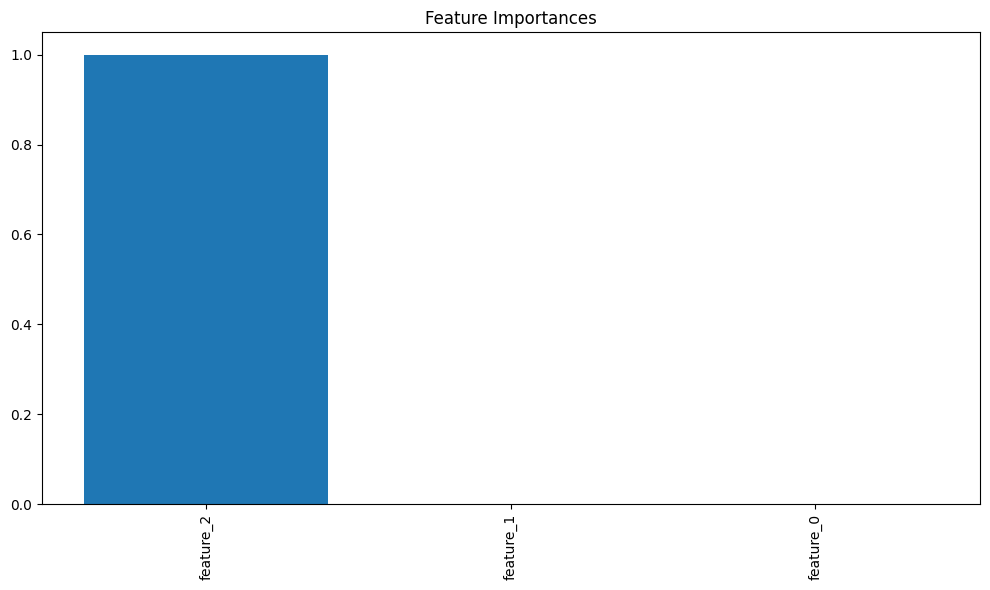

In [111]:
# Plot feature importances
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importance[indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [112]:

# Export the decision tree into Graphviz dot format
from sklearn.tree import export_graphviz
import graphviz


In [113]:
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=feature_names,
                           class_names=np.unique(y).astype(str).tolist(),
                           filled=True, rounded=True,
                           special_characters=True)

In [114]:
# Create a graph from dot data
graph = graphviz.Source(dot_data)


In [115]:
# Render the graph (this will create a PDF file)
graph.render("decision_tree_graphviz", format="pdf", view=True)

'decision_tree_graphviz.pdf'

In [116]:
# If you want to save as a dot file instead
graph.save("decision_tree_graphviz.dot")


'decision_tree_graphviz.dot'

In [117]:
print("Decision tree exported to 'decision_tree_graphviz.pdf' and 'decision_tree_graphviz.dot'")


Decision tree exported to 'decision_tree_graphviz.pdf' and 'decision_tree_graphviz.dot'


Logistic Regression

In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [121]:
# Assuming you've already created the crosstab
crosstab = pd.crosstab([data['domain'], data['ranking']], data['label'])

In [122]:

# Reset index to convert multi-index to columns
df = crosstab.reset_index()


In [123]:

# Store column names for later use
feature_columns = df.columns[:-1].tolist()  # All columns except the last one
target_column = df.columns[-1]              # The last column



In [124]:
# Prepare features (X) and target (y)
X = df[feature_columns]
y = df[target_column]

In [125]:

# Convert X to numeric type, replacing non-numeric values with NaN
X = X.apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [126]:
# Replace NaN values with 0 (or another appropriate value)
X = X.fillna(0)


In [127]:
# Convert y to numeric if it's not already
y = pd.to_numeric(y, errors='coerce')


In [128]:
# Convert X and y to numpy arrays
X = X.values
y = y.values

In [129]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
# Create and train the Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [131]:
# Make predictions on the test data
y_pred = lr.predict(X_test)


In [132]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.52


In [133]:
# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.04      0.08      9584
           1       0.51      0.99      0.67      9599

    accuracy                           0.52     19183
   macro avg       0.65      0.52      0.38     19183
weighted avg       0.65      0.52      0.38     19183



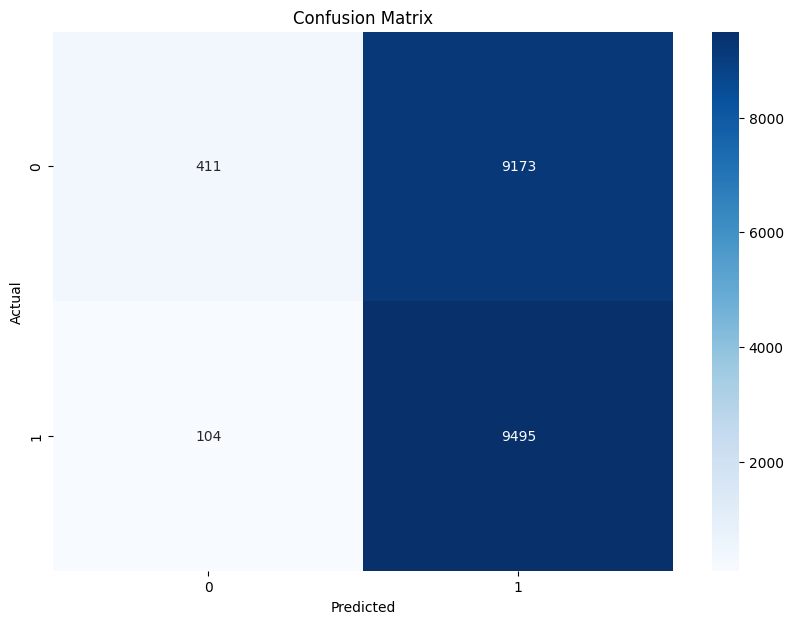

In [134]:

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [135]:
# Feature importance (coefficients)
feature_importance = np.abs(lr.coef_[0])  # Use absolute values
feature_names = [f"feature_{i}" for i in range(X.shape[1])]


In [136]:
# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]



In [137]:
# Print the feature ranking
print("\nFeature importance ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], feature_importance[indices[f]]))


Feature importance ranking:
1. feature_1 (0.000053)
2. feature_2 (0.000001)
3. feature_0 (0.000000)


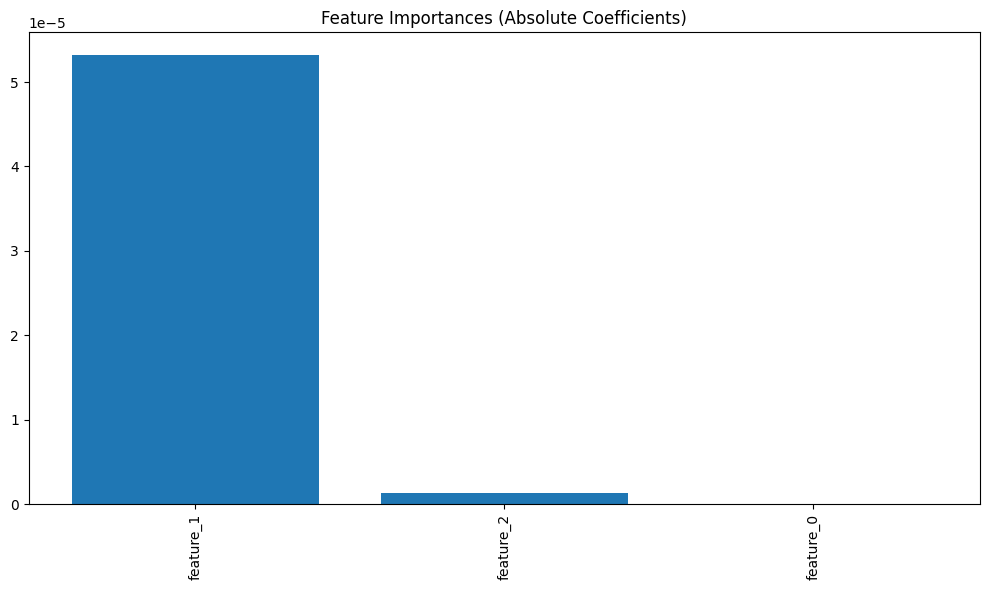

In [138]:
# Plot feature importances
plt.figure(figsize=(10,6))
plt.title("Feature Importances (Absolute Coefficients)")
plt.bar(range(X.shape[1]), feature_importance[indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()



In [139]:
# ROC Curve and AUC Score (for binary classification)
from sklearn.metrics import roc_curve, auc


In [140]:

# Check if it's a binary classification problem
if len(np.unique(y)) == 2:
    y_pred_proba = lr.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only applicable for binary classification problems.")

ROC curve is only applicable for binary classification problems.
